# Book Analysis of Sherlock Holmes

In [28]:
import urllib.request
import numpy as np
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import pandas as pd

## Text Read

In [25]:
sherlock_url = 'http://www.gutenberg.org/cache/epub/1661/pg1661.txt'
sherlock_text = urllib.request.urlopen(sherlock_url).read().decode("utf8")
sherlock_chapters = sherlock_text.split('ADVENTURE ')[1:]

## Character appearances

In [46]:
sherlock_characters = pd.DataFrame({
    'Sherlock': np.char.count(sherlock_chapters, 'Sherlock'), 
    'Watson': np.char.count(sherlock_chapters, 'Watson'),
})

In [58]:
sherlock_characters

,Sherlock,Watson
0,10,6
1,10,10
2,7,4
3,10,4
4,10,4
5,10,16
6,10,9
7,9,12
8,5,0
9,6,7


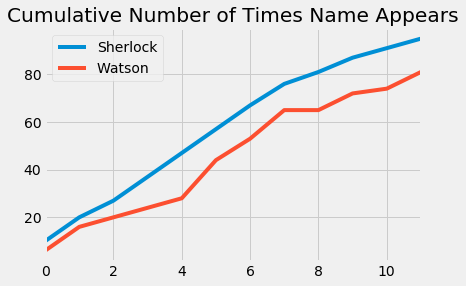

In [47]:
cum_counts = sherlock_characters.cumsum()
cum_counts.plot()
plots.title('Cumulative Number of Times Name Appears');

## Chapter sizes

In [55]:
chars_periods_sherlock = pd.DataFrame({
        'Chapter Length': [len(s) for s in sherlock_chapters],
        'Number of Periods': np.char.count(sherlock_chapters, '.')
})

In [56]:
chars_periods_sherlock

,Chapter Length,Number of Periods
0,47613,587
1,50483,554
2,38734,391
3,52490,565
4,40375,428
5,50324,552
6,43079,473
7,54183,553
8,45564,454
9,45102,518


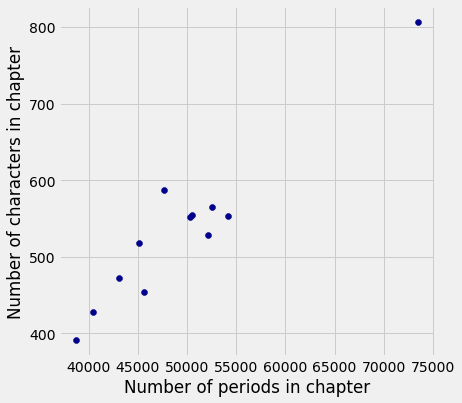

In [57]:
plots.figure(figsize=(6, 6))
plots.scatter(chars_periods_sherlock['Chapter Length'], 
              chars_periods_sherlock['Number of Periods'], 
              color='darkblue')
plots.xlabel('Number of periods in chapter')
plots.ylabel('Number of characters in chapter');